In [65]:

from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.exposure import histogram
import os
import math


<Figure size 432x288 with 0 Axes>

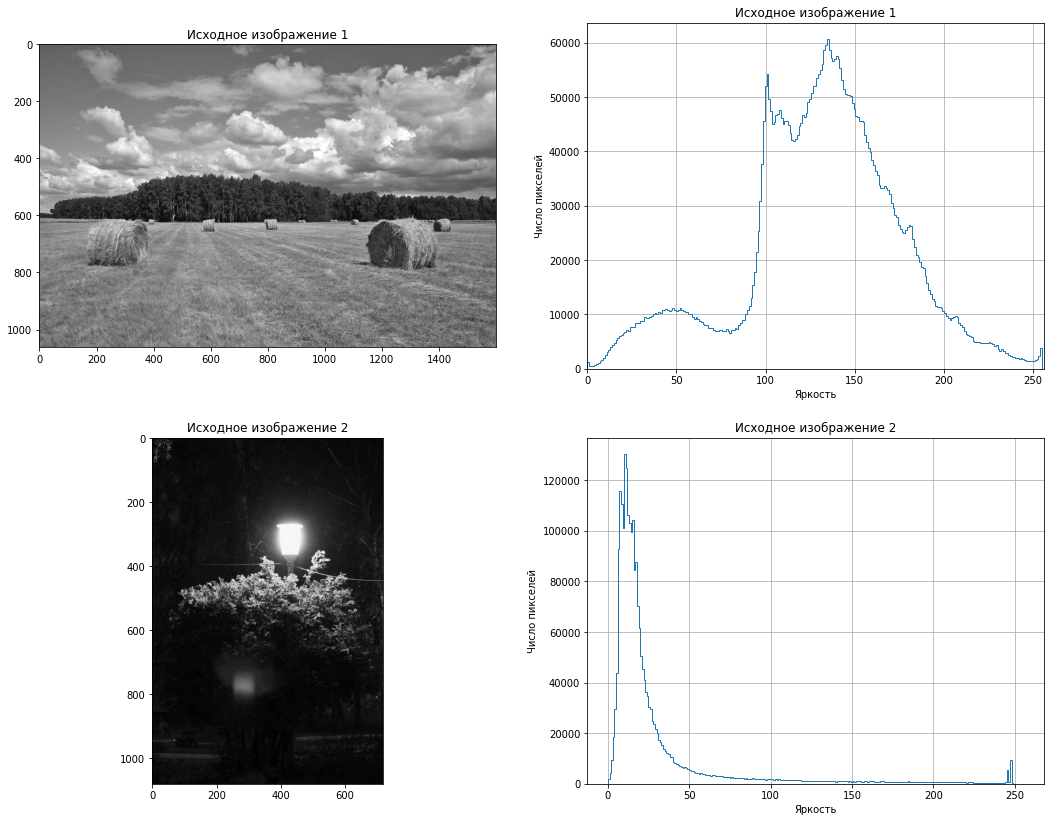

In [66]:
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax2.set_title('Исходное изображение 1')
ax1.set_title('Исходное изображение 1')
ax3.set_title('Исходное изображение 2')
ax4.set_title('Исходное изображение 2')
ax2.set_xlabel('Яркость')
ax2.set_ylabel('Число пикселей')
ax4.set_xlabel('Яркость')
ax4.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax2.set_xlim(0, 256)
ax2.grid(True)
ax4.grid(True)

image1 = cv2.imread("01.png") #Открываем изображение.
image2 = cv2.imread("02.png") #Открываем изображение.

ax1.imshow(image1)
ax2.hist(image1.ravel(),bins = 256, histtype = 'step' )
ax3.imshow(image2)
ax4.hist(image2.ravel(),bins = 256, histtype = 'step' )

plt.show()

In [67]:
# size1 = image1.shape
# size2 = image2.shape
# print(size1)
# print(size2)

<Figure size 432x288 with 0 Axes>

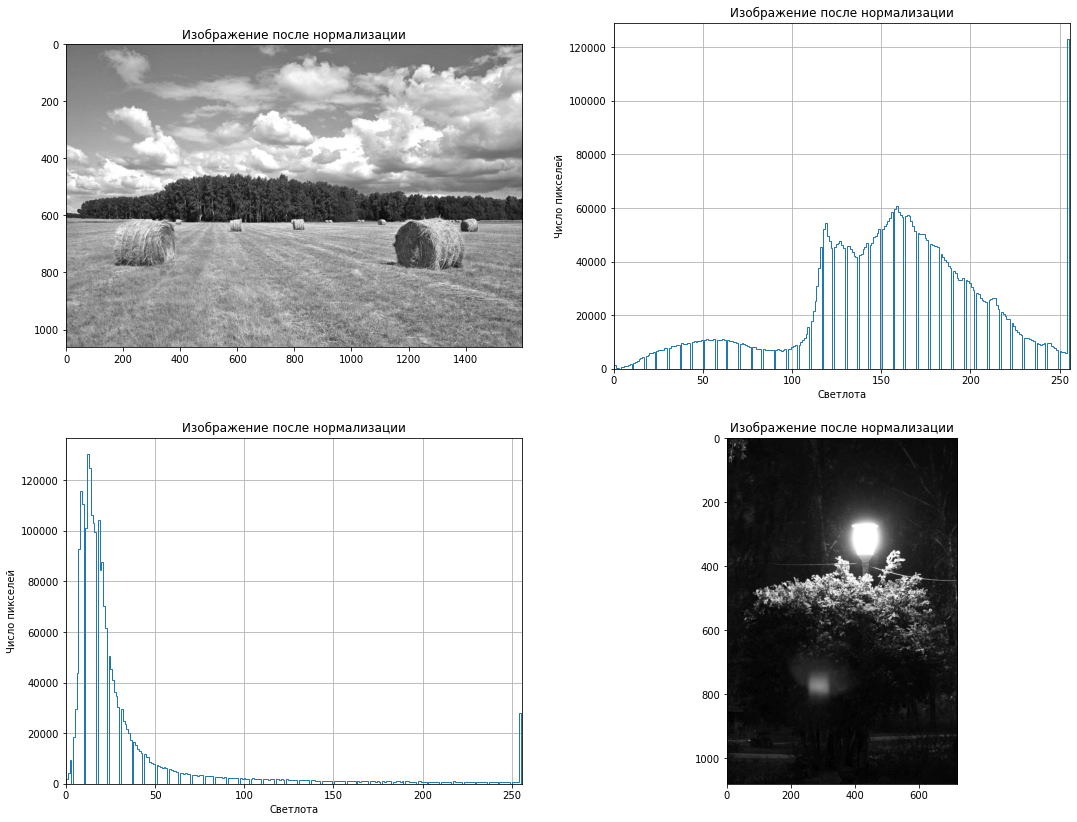

In [68]:
#нормализация гистограмм
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax2.set_title('Изображение после нормализации')
ax1.set_title('Изображение после нормализации')
ax3.set_title('Изображение после нормализации')
ax4.set_title('Изображение после нормализации')
ax2.set_xlabel('Светлота')
ax2.set_ylabel('Число пикселей')
ax3.set_xlabel('Светлота')
ax3.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax3.set_xlim(0, 256)
ax2.grid(True)
ax3.grid(True)

image1N = image1.copy()
image2N = image2.copy()

image1N = cv2.normalize(image1N, None, 0, 300, norm_type=cv2.NORM_MINMAX)
image2N = cv2.normalize(image2N, None, 0, 300, norm_type=cv2.NORM_MINMAX)


ax2.hist(image1N.ravel(), bins = 256, histtype = 'step')
ax1.imshow(image1N)
ax3.hist(image2N.ravel(), bins = 256, histtype = 'step')
ax4.imshow(image2N)

plt.show()

In [69]:
cv2.imwrite("01_norm.png", image1N)
cv2.imwrite("02_norm.png", image2N)

True

<Figure size 432x288 with 0 Axes>

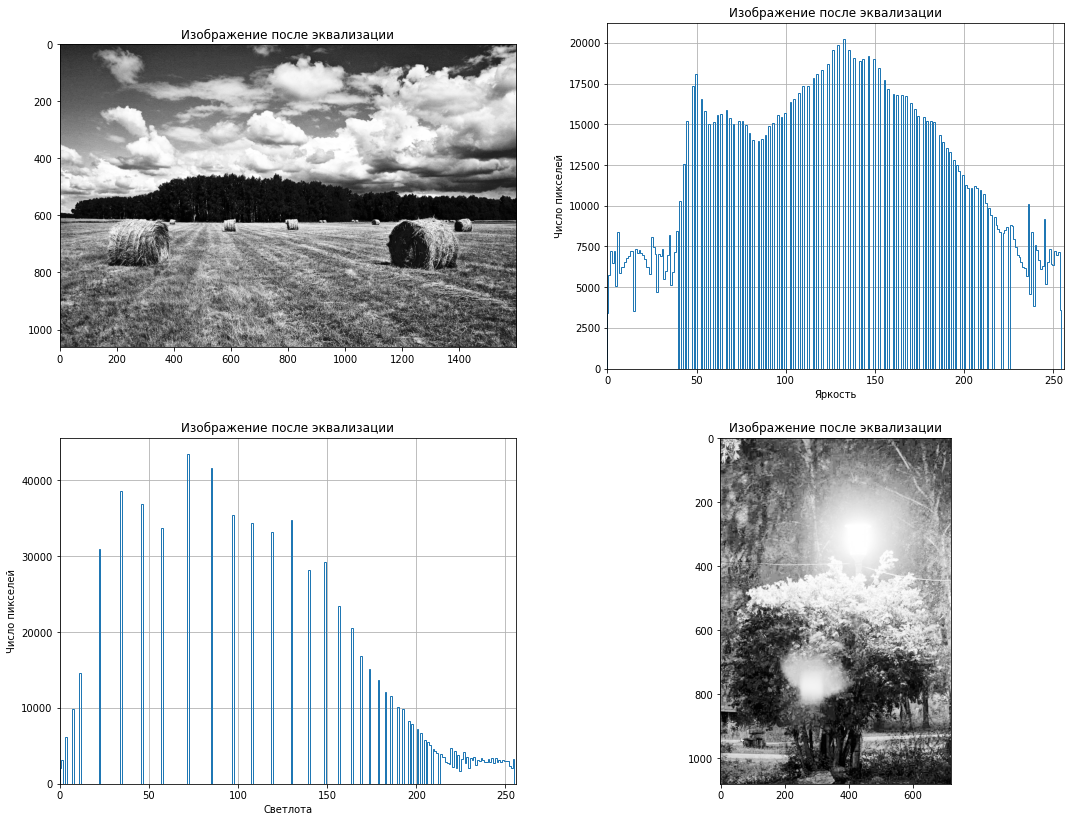

In [70]:
#Эквализация гистограмм
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)

ax2.set_title('Изображение после эквализации')
ax1.set_title('Изображение после эквализации')
ax3.set_title('Изображение после эквализации')
ax4.set_title('Изображение после эквализации')
ax2.set_xlabel('Светлота')
ax2.set_ylabel('Число пикселей')
ax3.set_xlabel('Светлота')
ax3.set_ylabel('Число пикселей')
ax2.set_xlim(0, 256)
ax3.set_xlim(0, 256)
ax2.grid(True)
ax3.grid(True)

image1Q = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2Q = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image1Q = cv2.equalizeHist(image1Q)
image2Q = cv2.equalizeHist(image2Q)

cv2.imwrite("01_q.png", image1Q)
cv2.imwrite("02_q.png", image2Q)

ax2.hist(image1Q.ravel(), bins = 256, histtype = 'step', align = 'left', stacked = True)
ax1.imshow(image1Q, cmap="gray")

ax3.hist(image2Q.ravel(), bins = 256, histtype = 'step')
ax4.imshow(image2Q, cmap="gray")

plt.show()

d:\python\image_processing_labs\venv\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

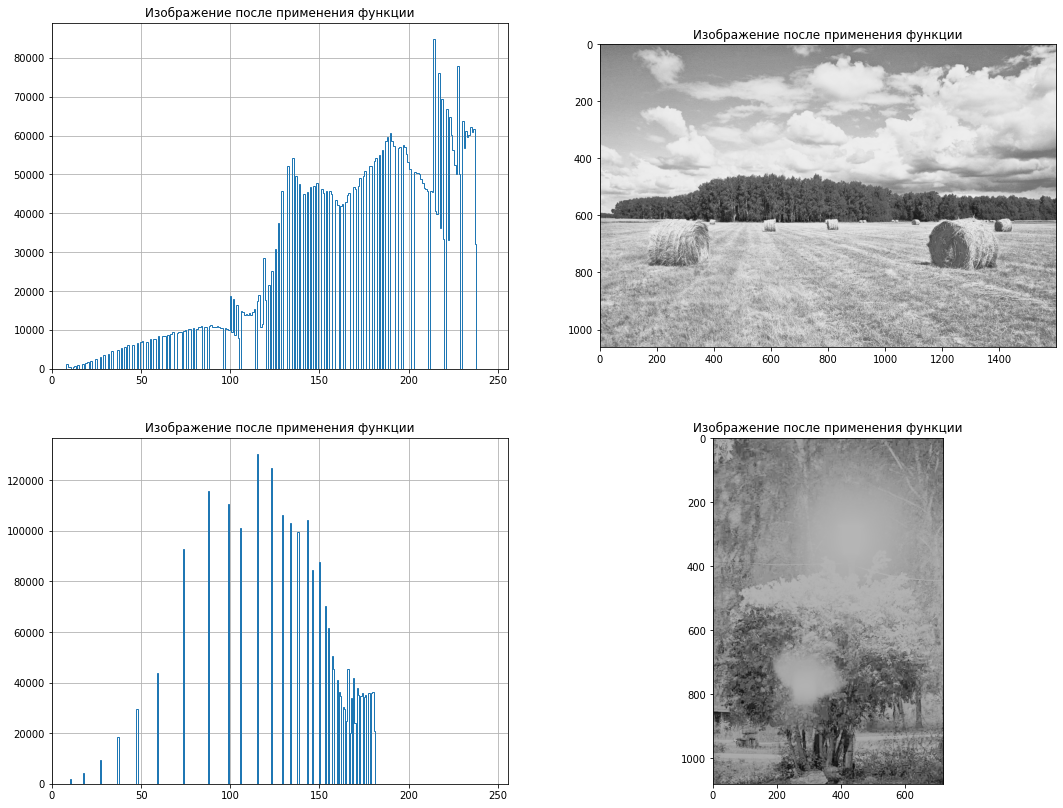

In [71]:
fig = plt.figure()

fig, ([ax1, ax2],[ax3, ax4] ) = plt.subplots(
    nrows=2, ncols=2,
    figsize=(18, 14)
)
ax1.set_title('Изображение после применения функции')
ax2.set_title('Изображение после применения функции')
ax3.set_title('Изображение после применения функции')
ax4.set_title('Изображение после применения функции')
ax1.set_xlim(0, 256)
ax3.set_xlim(0, 256)
ax1.grid(True)
ax3.grid(True)
x = np.arange(1, 255, 1)
y = x**2+20*x+44
# y=math.sin(x)
def find_closest(A, target):
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A) - 1)
    left = A[idx - 1]
    right = A[idx]
    idx -= target - left < right - target
    return A[idx]
def function_prived(image, x, y):
    # функция распределения гистограммы
    hist, hist_centers = histogram(image)
    img_accum = []
    func_accum = []    
    dict_img = {}
    dict_func = {}
    dict_res = {}
    s = 0
    for i in range(len(hist)):
        s += hist[i]
        img_accum.append(s)
    for key, val in zip(hist_centers, img_accum):
        dict_img[key] = val
    s = 0
    for i in range(len(y)):
        s += y[i]
        func_accum.append(s)
    for key, val in zip(x, func_accum):
        dict_func[key] = val
    A = np.array(func_accum)
    target = list(img_accum)
    new_match = find_closest(A, target)
    tmp = []
    for i in find_closest(A, target):
        for key, value in dict_func.items():  
            if value == i:
                tmp.append(key)
    for key, value in zip(hist_centers, tmp):
        dict_res[key] = value
    shape_img = image.shape   
    image_copy = image.copy()
    image_copy = image_copy.ravel()
    for i in range(len(image_copy)):
        image_copy[i] = dict_res[image_copy[i]]
    image_copy = image_copy.reshape(shape_img)   
    return image_copy   

image_1_priv = function_prived(image1, x, y)
image_2_priv = function_prived(image2, x, y)

cv2.imwrite("01_priv.png", image_1_priv)
cv2.imwrite("02_priv.png", image_2_priv)

ax1.hist(image_1_priv.ravel(), bins = 256, histtype = 'step')
ax2.imshow(image_1_priv, cmap="gray")
ax3.hist(image_2_priv.ravel(), bins = 256, histtype = 'step')
ax4.imshow(image_2_priv, cmap="gray")
# 
plt.show()


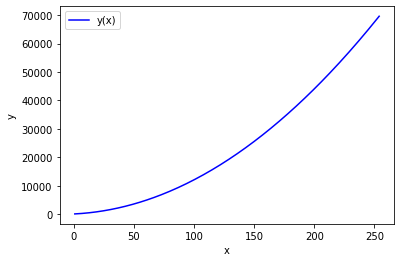

In [72]:


x = np.arange(1, 255, 1)                 # от -5 до 2 сделать 100 точек

fig, ax = plt.subplots()                        # будет 1 график, на нем:
ax.plot(x, y, color="blue", label="y(x)")      # функция y1(x), синий, надпись y(x)
ax.set_xlabel("x")                              # подпись у горизонтальной оси х
ax.set_ylabel("y")                              # подпись у вертикальной оси y
ax.legend()                                     # показывать условные обозначения

plt.show()